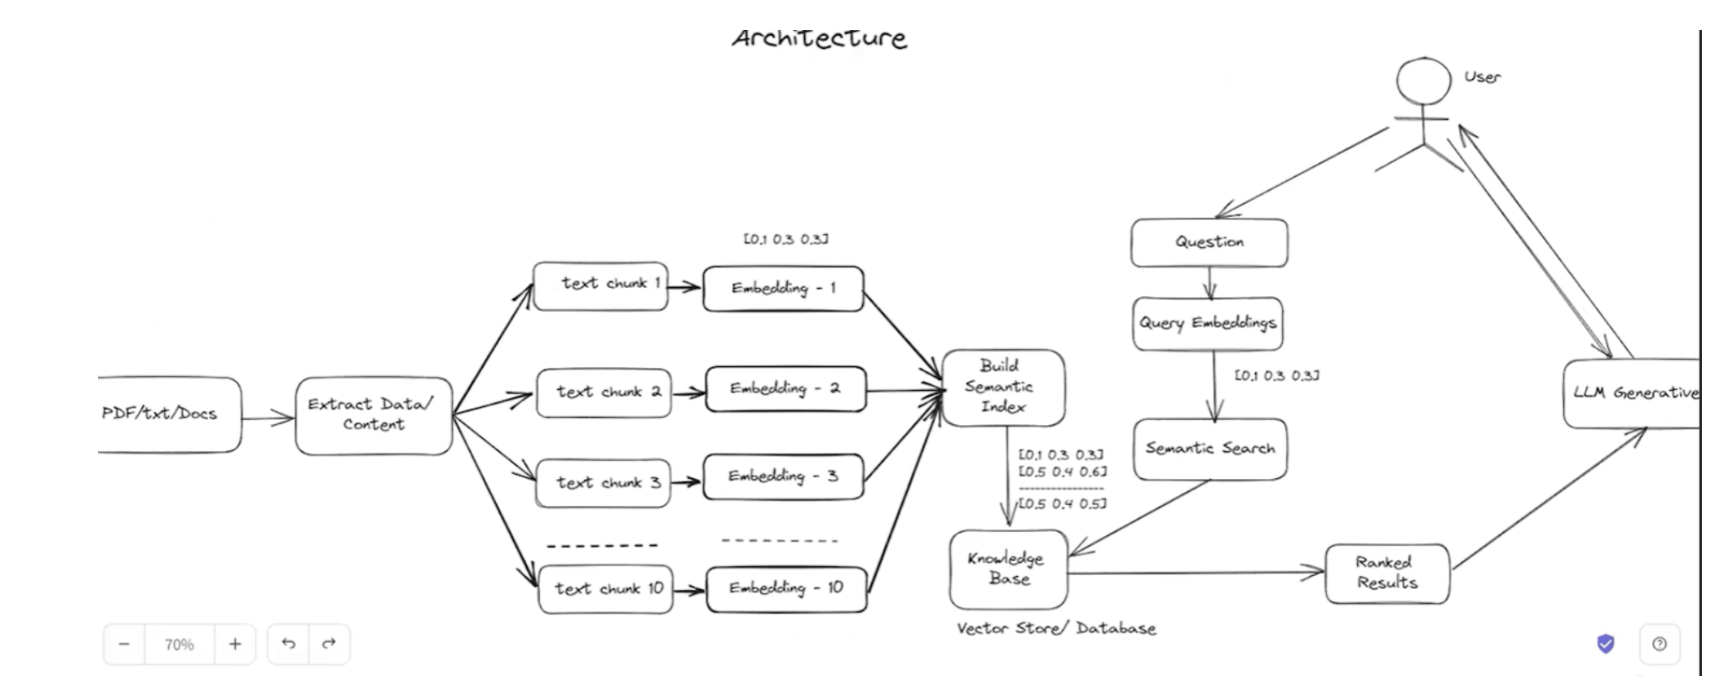

# Text Data/"corpus" data

In [1]:
text_data = [
    "Albert Einstein developed the theory of relativity, which revolutionized theoretical physics.",
    "The capital of France is Paris, known for landmarks such as the Eiffel Tower and the Louvre Museum.",
    "Photosynthesis is the process by which green plants use sunlight to synthesize nutrients from carbon dioxide and water.",
    "Python is a popular programming language known for its readability and vast ecosystem of libraries.",
    "The Great Wall of China was built to protect Chinese states from invasions and raids.",
    "Water boils at 100 degrees Celsius at sea level.",
    "The human brain contains approximately 86 billion neurons.",
    "The Amazon Rainforest is often referred to as the 'lungs of the Earth' due to its vast oxygen production.",
    "The Pythagorean theorem states that in a right-angled triangle, a² + b² = c².",
    "The first manned moon landing was in 1969 during NASA's Apollo 11 mission.",
    "The mitochondria is known as the powerhouse of the cell.",
    "In machine learning, overfitting occurs when a model performs well on training data but poorly on unseen data.",
    "Blockchain is a decentralized digital ledger that records transactions across many computers.",
    "A haiku is a traditional form of Japanese poetry with a 5-7-5 syllable structure.",
    "Renewable energy sources include solar, wind, hydroelectric, and geothermal power.",
    "The COVID-19 pandemic began in late 2019 and significantly impacted global health and economies.",
    "Black holes are regions in space where the gravitational pull is so strong that nothing, not even light, can escape.",
    "Shakespeare wrote plays such as Hamlet, Macbeth, and Romeo and Juliet.",
    "The periodic table organizes chemical elements by increasing atomic number and similar properties.",
    "Nelson Mandela was a South African anti-apartheid revolutionary who became the country's first black president."
]


In [2]:
text_data


['Albert Einstein developed the theory of relativity, which revolutionized theoretical physics.',
 'The capital of France is Paris, known for landmarks such as the Eiffel Tower and the Louvre Museum.',
 'Photosynthesis is the process by which green plants use sunlight to synthesize nutrients from carbon dioxide and water.',
 'Python is a popular programming language known for its readability and vast ecosystem of libraries.',
 'The Great Wall of China was built to protect Chinese states from invasions and raids.',
 'Water boils at 100 degrees Celsius at sea level.',
 'The human brain contains approximately 86 billion neurons.',
 "The Amazon Rainforest is often referred to as the 'lungs of the Earth' due to its vast oxygen production.",
 'The Pythagorean theorem states that in a right-angled triangle, a² + b² = c².',
 "The first manned moon landing was in 1969 during NASA's Apollo 11 mission.",
 'The mitochondria is known as the powerhouse of the cell.',
 'In machine learning, overfitti

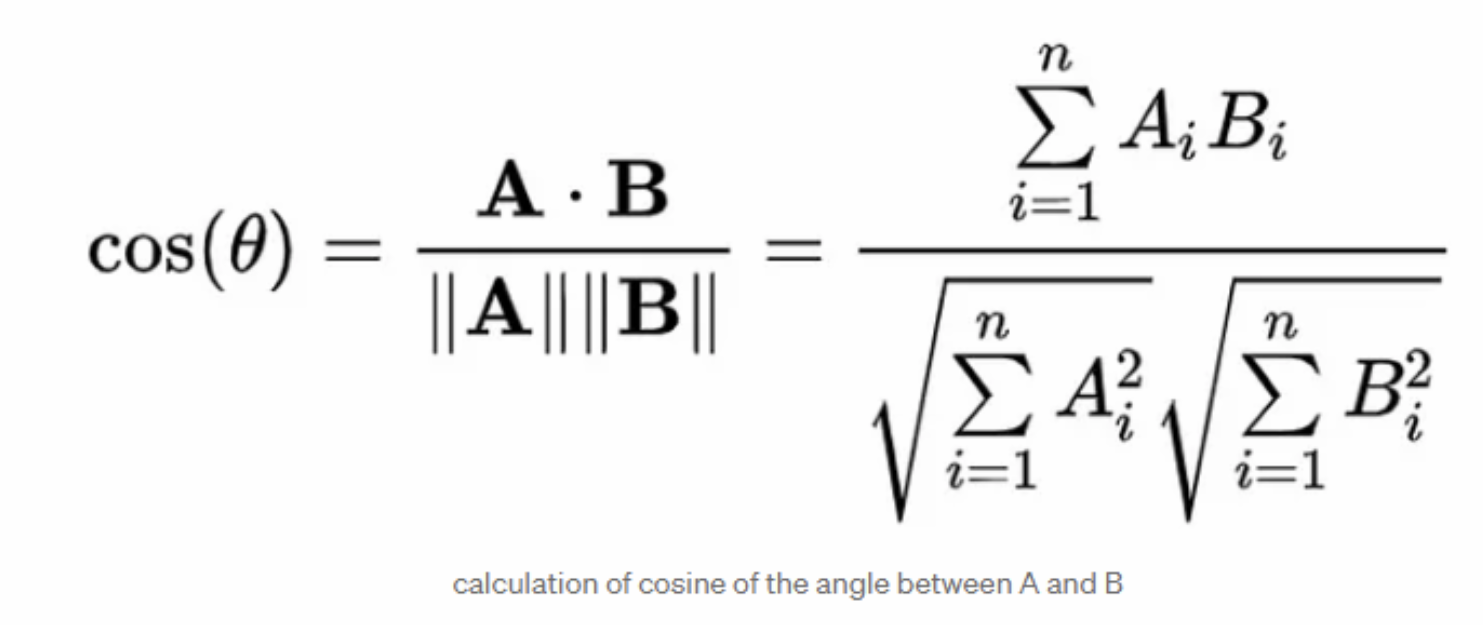

In [3]:
user_query="I am an Indian and I live in India"

In [4]:
document ="India is hOME TO EVERY iNDIAN AND eVERY One "  # Statement from text_data itself


In [5]:
query_tokens=user_query.lower().split()

query_tokens

['i', 'am', 'an', 'indian', 'and', 'i', 'live', 'in', 'india']

In [6]:
document_tokens=document.lower().split()
document_tokens

['india', 'is', 'home', 'to', 'every', 'indian', 'and', 'every', 'one']

In [7]:
from collections import Counter
import math

In [8]:
query_counter=Counter(query_tokens)
query_counter

Counter({'i': 2,
         'am': 1,
         'an': 1,
         'indian': 1,
         'and': 1,
         'live': 1,
         'in': 1,
         'india': 1})

In [9]:
document_counter=Counter(document_tokens)
document_counter

Counter({'india': 1,
         'is': 1,
         'home': 1,
         'to': 1,
         'every': 2,
         'indian': 1,
         'and': 1,
         'one': 1})

In [10]:
query_vector = list(query_counter.values())
query_vector # Sentence vector

[2, 1, 1, 1, 1, 1, 1, 1]

In [11]:
document_vector = list(document_counter.values())
document_vector


[1, 1, 1, 1, 2, 1, 1, 1]

In [ ]:
for tokens in query_counter.keys() & document_counter.keys():
    print(tokens)

india
indian
and


In [ ]:
mylist=[]
for tokens in query_counter.keys() & document_counter.keys():
    mylist.append(query_counter[tokens]*document_counter[tokens])
mylist

[1, 1, 1]

In [ ]:
dot_prod=sum(mylist)

In [ ]:
query_magnitude = math.sqrt(sum(query_counter[tokens] **2 for tokens in query_counter))
query_magnitude

3.3166247903554

In [ ]:
document_magnitude = math.sqrt(sum(document_counter[tokens] **2 for tokens in document_counter))
document_magnitude

3.3166247903554

In [ ]:
similarity = dot_prod / (query_magnitude * document_magnitude)
similarity

0.2727272727272727

In [13]:
def cosine_similarity(query, document):
    # Tokenize and lowercase the query and document
    query_tokens = query.lower().split()
    document_tokens = document.lower().split()

    # Create counters for token frequencies
    query_counter = Counter(query_tokens)
    document_counter = Counter(document_tokens)

    # Calculate the dot product of the query and document vectors
    dot_prod = sum(query_counter[token] * document_counter[token] for token in query_counter.keys() & document_counter.keys())

    # Calculate the magnitude of the query vector
    query_magnitude = math.sqrt(sum(query_counter[token] ** 2 for token in query_counter))

    # Calculate the magnitude of the document vector
    document_magnitude = math.sqrt(sum(document_counter[token] ** 2 for token in document_counter))

    # Calculate cosine similarity
    if query_magnitude * document_magnitude == 0:
        return 0  # Avoid division by zero
    else:
        return dot_prod / (query_magnitude * document_magnitude)

In [14]:
def return_response(query,text_data):
    similarities = []
    for document in text_data:
        similarity = cosine_similarity(query, document)
        similarities.append(similarity)

    # Find the index of the most similar document
    most_similar_index = similarities.index(max(similarities))

    # Return the most similar document
    return text_data[most_similar_index]

In [15]:
query="Water Boils at?"

In [16]:
context=return_response(query,text_data)
context

'Water boils at 100 degrees Celsius at sea level.'

###### Now Generating model is built

# Configuring LLM in your System

LLMA

Hugging Face

Ollma

###### AUGUMENT THIS RESPONSE USING LLMA2 MODEL

In [17]:
# def build_llm_prompt(contexts, user_query):
    #joined_context = "\n".join(contexts)
prompt= f"""You are an AI assistant. Use the provided context to answer the user's question as accurately as possible.
If the answer cannot be found in the context, respond with "I don't know based on the given context."

Context:
{context}

Question:
{query}

Answer:"""


In [18]:
print(prompt)

You are an AI assistant. Use the provided context to answer the user's question as accurately as possible.
If the answer cannot be found in the context, respond with "I don't know based on the given context."

Context:
Water boils at 100 degrees Celsius at sea level.

Question:
Water Boils at?

Answer:


In [20]:
pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.4/131.4 kB 700.3 kB/s eta 0:00:00


In [21]:
import os

from groq import Groq

client = Groq(
    api_key="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"
)

query=input()
context=return_response(query,text_data)
# def build_llm_prompt(contexts, user_query):
    #joined_context = "\n".join(contexts)
prompt= f"""You are an AI assistant. Use the provided context to answer the user's question as accurately as possible.
If the answer cannot be found in the context, respond with "I don't know based on the given context."

Context:
{context}

Question:
{query}

Answer:"""

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": prompt,
        }
    ],
    model="llama-3.1-8b-instant",
)

print(chat_completion.choices[0].message.content)

Who is Ms DHoni
I don't know based on the given context. There's no mention of a person named Ms Dhoni in the provided context about blockchain.
